<a href="https://colab.research.google.com/github/victorwung/twn/blob/master/twn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data
- 第一個欄位SUBSCR_ID的正負號代表兩種不同的用戶(用戶編碼)，其他的欄位你可以望文生義猜測他的意思，或許你可以對這份資料做：
- 1.EDA 看看資料間的關係，找出一些insight
- 2.因為這裡面每筆資料代表的是每一個不同的人，你可以做個cluster 分群，並說明為什麼這樣分群，以及每群以白話文描述其特質嗎？

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read data
raw_data = pd.read_csv('twm_ds_test.csv')
# raw_data = pd.read_csv('twn/twm_ds_test.csv')

In [ ]:
raw_data.shape

(20293, 42)

## Process

In [ ]:
# process
raw_data.columns = raw_data.columns.str.lower()
# data = data.fillna(0)

In [ ]:
%%time
for col in raw_data.columns[1:]:
    raw_data[col] = raw_data[col].fillna(raw_data[col].median())
#     print('col {} done'.format(col))
print('Fill N/A done.')

Fill N/A done.
CPU times: user 28.7 ms, sys: 795 µs, total: 29.5 ms
Wall time: 36 ms


In [ ]:
# data.info()

In [ ]:
%%time
for col in raw_data.columns[1:]:
    q1_val = np.percentile(raw_data[col], 25)
    q4_val = np.percentile(raw_data[col], 75)
#     print('col:{}, q1:{}, q4:{}'.format(col, q1_val, q4_val))
    col_type = col.replace('_score', '')  
#     col_type = col.replace('score', 'type')
    raw_data[col_type] = raw_data.apply(lambda x: 1 if x[col] <= q1_val else (3 if x[col] >= q4_val else 2), axis=1)
#     print('col {} done'.format(col_type))
print('Assign type done.')

Assign type done.
CPU times: user 11.1 s, sys: 63.8 ms, total: 11.2 s
Wall time: 13.4 s


In [ ]:
raw_data.head()

,subscr_id,taxi_driver_score,buddhism_score,pregnant_score,dating_score,wealth_score,married2020_score,gamble_score,kid_above6_score,high_school2021_score,...,kindness,medicalcare,christian,investor,deliverman,health_life,dpp,sex_demand,camper,married2021
0,6279363,0.113409,0.848155,0.281564,0.257194,0.393156,0.290093,0.468732,0.730413,0.062494,...,1,3,3,1,1,2,3,1,3,3
1,58206281,0.808846,0.029803,0.364543,0.810444,0.118911,0.817450,0.042294,0.152948,0.954729,...,1,1,1,2,3,2,2,1,1,3
2,7046864,0.614134,0.908686,0.869077,0.905806,0.943910,0.712974,0.634033,0.990084,0.192940,...,3,2,3,3,1,3,2,3,3,3
3,11002637,0.564619,0.069156,0.044727,0.108269,0.222076,0.132267,0.696573,0.604216,0.589311,...,3,2,1,1,1,1,3,3,2,2
4,60820330,0.169591,0.431785,0.021300,0.336096,0.223633,0.058069,0.201803,0.625873,0.497099,...,1,3,2,1,1,1,2,3,1,1


## Extract feature types

In [ ]:
keep_cols = ['subscr_id'] + raw_data.columns[42:].tolist()

In [ ]:
data = raw_data[keep_cols].copy()

In [ ]:
data.shape

(20293, 42)

## Clustering

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# features
X = data.iloc[:, 1:]

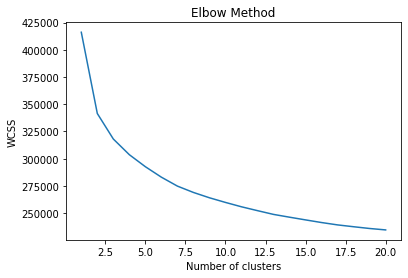

CPU times: user 1min 40s, sys: 14.2 s, total: 1min 54s
Wall time: 1min 12s


In [ ]:
%%time
# kmeans
wcss = []
max_num_cluster = 20
for i in range(1, max_num_cluster+1, 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, max_num_cluster+1, 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
%%time
# run kmeans
num_final_cluster = 7
kmeans = KMeans(n_clusters=num_final_cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

CPU times: user 3.64 s, sys: 858 ms, total: 4.5 s
Wall time: 2.33 s


In [ ]:
data.insert(0, 'cluster_id', '')
data['cluster_id'] = pred_y

In [ ]:
data.head()

,cluster_id,subscr_id,taxi_driver,buddhism,pregnant,dating,wealth,married2020,gamble,kid_above6,...,kindness,medicalcare,christian,investor,deliverman,health_life,dpp,sex_demand,camper,married2021
0,6,6279363,1,3,1,1,2,1,2,3,...,1,3,3,1,1,2,3,1,3,3
1,0,58206281,3,1,2,3,1,3,1,1,...,1,1,1,2,3,2,2,1,1,3
2,4,7046864,2,3,3,3,3,3,2,3,...,3,2,3,3,1,3,2,3,3,3
3,6,11002637,2,1,1,1,1,1,2,2,...,3,2,1,1,1,1,3,3,2,2
4,6,60820330,1,2,1,2,1,1,1,2,...,1,3,2,1,1,1,2,3,1,1


In [ ]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype(str).apply(lambda x : x.name + '_' + x)

## Cluster Distribution

In [ ]:
cluster_distribution = data[['cluster_id', 'subscr_id']].groupby('cluster_id')['subscr_id'].count().reset_index().rename({'subscr_id': 'cnt'})

In [ ]:
cluster_distribution

,cluster_id,subscr_id
0,0,2246
1,1,4366
2,2,2420
3,3,2458
4,4,3277
5,5,2502
6,6,3024


## Apriori

In [ ]:
# apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### select a clutser

In [ ]:
cluster_no = 0
one_clutser_data = data[data['cluster_id']==cluster_no].copy().reset_index(drop=True)

In [ ]:
# skip cluster_id, subscr_id
one_clutser_data_features = one_clutser_data.iloc[:, 2:].copy()


In [ ]:
one_clutser_data_features.shape

(2246, 41)

In [ ]:
# list of list
dataset = one_clutser_data_features.values.tolist() 

### run Apriori

In [ ]:
### encode and fit
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_tx = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df_tx.shape

(2246, 123)

In [ ]:
### setting threshold
threshold_support = 0.7
threshold_confidence = 0.7 
threshold_lift = 1

In [ ]:
### frequent_itemsets
frequent_itemsets = apriori(df_tx, min_support=threshold_support, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.844613,(age_1)
1,0.723508,(buddhism_1)
2,0.767587,(college_student2020_3)
3,0.782280,(hanfan_1)
4,0.780499,(jolin_3)
5,0.787622,(lgbt_3)
6,0.710151,(married2021_3)


In [ ]:
# ### association_rules
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
# ### lift>1 的結果
# # target_rules = rules[(rules['lift'] > threshold_lift)].reset_index(drop=True)
# target_rules = rules[(rules['lift'] >= threshold_lift)&(rules['confidence'] >= threshold_confidence)].reset_index(drop=True)


## Function get frequent itemsets

In [ ]:
def get_clutser_frequent_itemset(data, cluster_no, threshold_support):
  ### preprocess
  # select one cluster
  one_clutser_data = data[data['cluster_id']==cluster_no].copy().reset_index(drop=True)
  # skip cluster_id, subscr_id
  one_clutser_data_features = one_clutser_data.iloc[:, 2:].copy()
  print('cluster {} shape: {}'.format(cluster_no, one_clutser_data_features.shape))
  # list of list
  dataset = one_clutser_data_features.values.tolist()

  ### encode and fit
  te = TransactionEncoder()
  te_ary = te.fit(dataset).transform(dataset)
  df_tx = pd.DataFrame(te_ary, columns=te.columns_)

  ### frequent_itemsets
  frequent_itemsets = apriori(df_tx, min_support=threshold_support, use_colnames=True)
  print('cluster {} done'.format(cluster_no))

  return frequent_itemsets

In [ ]:
### setting threshold
threshold_support = 0.7
# threshold_confidence = 0.7 
# threshold_lift = 1

In [ ]:
%%time
# run every cluster
cluster_0_frequent_itemsets = get_clutser_frequent_itemset(data, 0, threshold_support)
cluster_1_frequent_itemsets = get_clutser_frequent_itemset(data, 1, threshold_support)
cluster_2_frequent_itemsets = get_clutser_frequent_itemset(data, 2, threshold_support)
cluster_3_frequent_itemsets = get_clutser_frequent_itemset(data, 3, threshold_support)
cluster_4_frequent_itemsets = get_clutser_frequent_itemset(data, 4, threshold_support)
cluster_5_frequent_itemsets = get_clutser_frequent_itemset(data, 5, threshold_support)
cluster_6_frequent_itemsets = get_clutser_frequent_itemset(data, 6, threshold_support)

cluster 0 shape: (2246, 41)
cluster 0 done
cluster 1 shape: (4366, 41)
cluster 1 done
cluster 2 shape: (2420, 41)
cluster 2 done
cluster 3 shape: (2458, 41)
cluster 3 done
cluster 4 shape: (3277, 41)
cluster 4 done
cluster 5 shape: (2502, 41)
cluster 5 done
cluster 6 shape: (3024, 41)
cluster 6 done
CPU times: user 17.9 s, sys: 236 ms, total: 18.1 s
Wall time: 18.5 s


## Observe Results

### With Insights

In [ ]:
cluster_0_frequent_itemsets

,support,itemsets
0,0.844613,(age_1)
1,0.723508,(buddhism_1)
2,0.767587,(college_student2020_3)
3,0.782280,(hanfan_1)
4,0.780499,(jolin_3)
5,0.787622,(lgbt_3)
6,0.710151,(married2021_3)


In [ ]:
# cluster_1_frequent_itemsets

In [ ]:
# cluster_2_frequent_itemsets

In [ ]:
# cluster_3_frequent_itemsets

In [ ]:
cluster_4_frequent_itemsets

,support,itemsets
0,0.743973,(beauty_clinic_3)
1,0.803784,(cat_lover_3)
2,0.751297,(cosmetic_3)
3,0.788526,(dog_lover_3)
4,0.800427,(estate_mortgage_3)
5,0.752823,(health_life_3)
6,0.704608,(investor_3)
7,0.793409,(jolin_3)
8,0.743058,(kid_under6_3)
9,0.718035,(ktv_3)


In [ ]:
cluster_5_frequent_itemsets

,support,itemsets
0,0.787370,(buddhism_3)
1,0.709432,(christian_3)
2,0.709832,(kid_above6_3)


In [ ]:
cluster_6_frequent_itemsets

,support,itemsets
0,0.725198,(age_3)
1,0.790344,(college_student2020_1)
2,0.716601,(jolin_1)
3,0.712632,(ktv_1)
4,0.821098,(lgbt_1)
5,0.733796,(married2021_1)
6,0.722222,(newbaby_1)


### Without Insights

In [ ]:
cluster_1_frequent_itemsets

,support,itemsets
0,0.749427,(beauty_clinic_2)
1,0.799817,(buddhism_2)
2,0.763628,(cat_lover_2)
3,0.734540,(christian_2)
4,0.737746,(college_student2020_2)
5,0.789510,(cosmetic_2)
6,0.782180,(dating_2)
7,0.786990,(dog_lover_2)
8,0.709574,(dpp_2)
9,0.727210,(gamble_2)


In [ ]:
cluster_2_frequent_itemsets

,support,itemsets
0,0.764876,(age_2)
1,0.884298,(baseball_2)
2,0.956612,(buddhism_2)
3,0.939669,(camper_2)
4,0.956198,(christian_2)
...,...,...
155675,0.702066,"(health_life_2, male_2, deliverman_2, ktv_2, p..."
155676,0.710331,"(health_life_2, deliverman_2, ktv_2, pregnant_..."
155677,0.705372,"(health_life_2, deliverman_2, baseball_2, dpp_..."
155678,0.710331,"(health_life_2, deliverman_2, baseball_2, ktv_..."


In [ ]:
cluster_3_frequent_itemsets

,support,itemsets
0,0.814890,(buddhism_1)
1,0.807974,(christian_1)
2,0.888934,(health_life_1)
3,0.806753,(investor_1)
4,0.735557,"(health_life_1, buddhism_1)"
5,0.735151,"(health_life_1, christian_1)"
6,0.736371,"(health_life_1, investor_1)"
